# Exploratory data analysis (EDA)

## Haberman Cancer Survival dataset

The [dataset](https://www.kaggle.com/gilsousa/habermans-survival-data-set) contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### About the file
1. Title:  Haberman's Survival Data
2. Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999
3. Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.
4. Number of Instances: 306
5. Number of Attributes: 4 (including the class attribute)
6. Attribute Information:
   Age of patient at time of operation (numerical),
   Patient's year of operation (year - 1900, numerical),
   Number of positive axillary nodes detected (numerical),
   Survival status (class attribute)
       1 = the patient survived 5 years or longer
       2 = the patient died within 5 year
7. Missing Attribute Values: None

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
#Load Iris.csv into a pandas dataFrame.
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## 1. High level statistics of the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
print("\nMedians:")
print(np.median(df["age"]))
print(np.median(df["year"]))
print(np.median(df["nodes"]))


Medians:
52.0
63.0
1.0


In [9]:
#data-points and features
df.shape

(306, 4)

In haberman dataset there is 306 data-points and 4 features are present

In [10]:
#column names in our dataset
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

Attribute Information: Age of patient at time of operation (numerical), Patient's year of operation (year - 1900, numerical), Number of positive axillary nodes detected (numerical), Survival status (class attribute)

In [11]:
#The number of data points for each class
df.status.value_counts()

1    225
2     81
Name: status, dtype: int64

    Number of classes = 2,
    1 = The patient survived 5 years or longer
    2 = The patient died within 5 year
    Data-points per class 1 = 224
    Data-points per class 1 = 81
    Here haberman dataset is not well balanced. But It's ok to proceed.

***Observations:***

1. The age of the patients vary from 30 to 83 with the median of 52.
2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 4 positive  axillary lymph nodes and nearly 25% of the patients have no positive  axillary lymph nodes
3. The target column is imbalanced with 74% of values are 1

## 2. Objective

To predict whether the patient who had undergone surgery for breast cancer will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive axillary nodes detected.

## 3. Univaraite analysis 

### 3.1 Distribution plots  

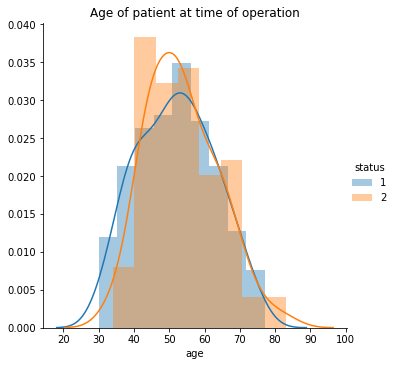

In [12]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Age of patient at time of operation')
plt.show();

***Patient's year of operation*** 

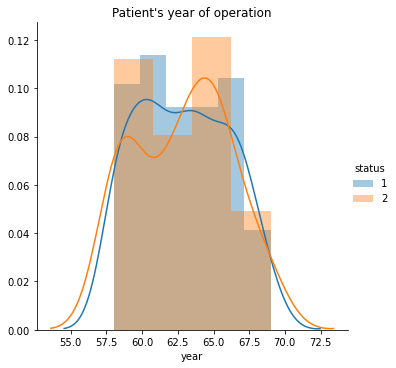

In [13]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Patient\'s year of operation')
plt.show();

***Number of positive axillary nodes detected***

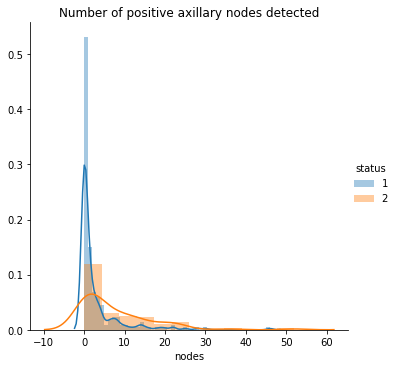

In [14]:
sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Number of positive axillary nodes detected')
plt.show();

In [15]:
df_1 = df.loc[df["status"] == 1];
df_2 = df.loc[df["status"] == 2];

### 3.2 PDF and CDF

***patient survived 5 years or longer***

<Figure size 432x288 with 0 Axes>

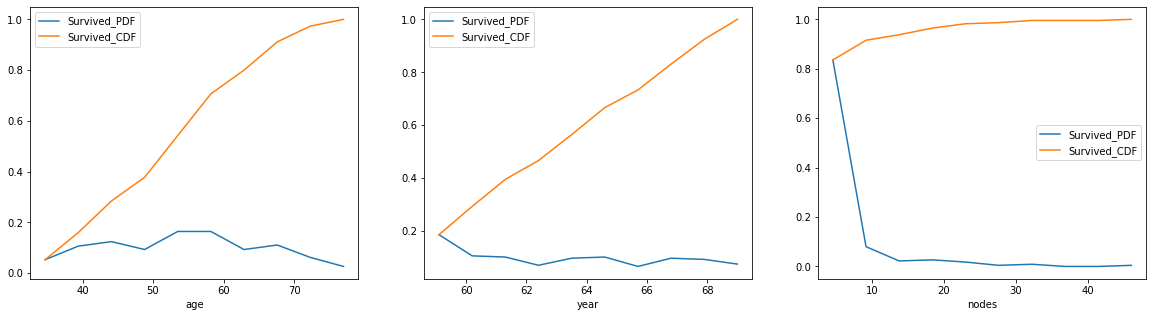

In [22]:
plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(131)

counts, bin_edges = np.histogram(df_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.legend(['Survived_PDF', 'Survived_CDF'])

plt.subplot(132)
counts, bin_edges = np.histogram(df_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.legend(['Survived_PDF', 'Survived_CDF'])

plt.subplot(133)
counts, bin_edges = np.histogram(df_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.legend(['Survived_PDF', 'Survived_CDF'])
plt.show()

***patient died within 5 year***

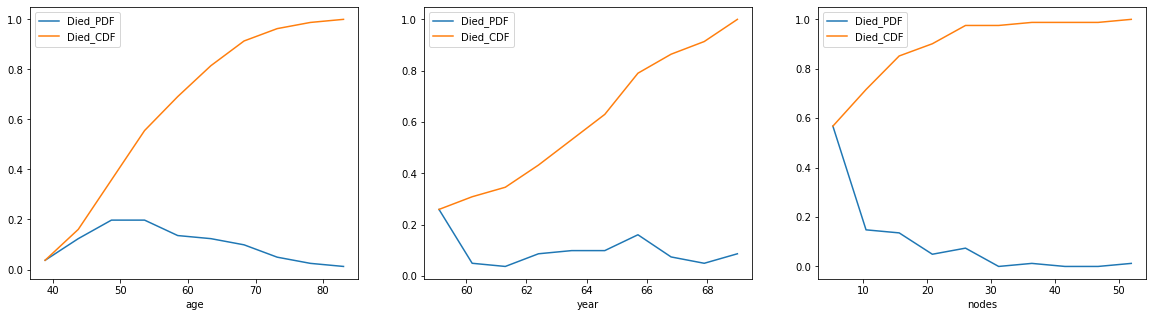

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(131)

counts, bin_edges = np.histogram(df_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.legend(['Died_PDF', 'Died_CDF'])

plt.subplot(132)
counts, bin_edges = np.histogram(df_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year')
plt.legend(['Died_PDF', 'Died_CDF'])

plt.subplot(133)
counts, bin_edges = np.histogram(df_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('nodes')
plt.legend(['Died_PDF', 'Died_CDF'])
plt.show()

### 3.3 Box Plots 

<Figure size 432x288 with 0 Axes>

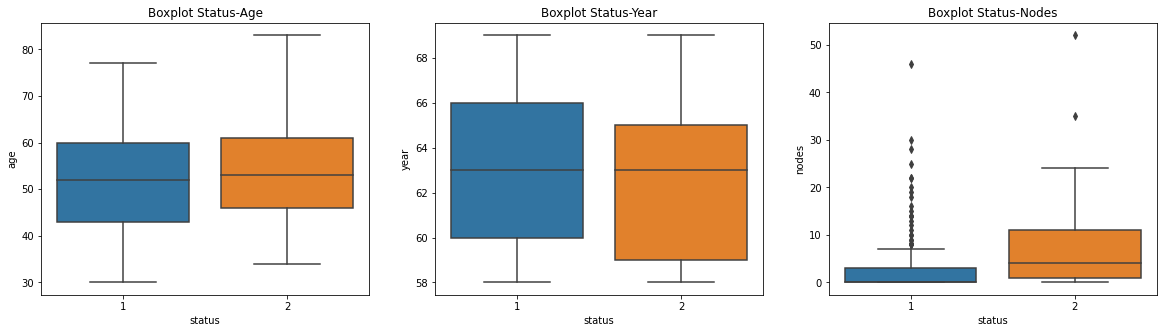

In [168]:
plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.boxplot(x='status',y='age', data=df)
plt.title('Boxplot Status-Age')
plt.subplot(132)
sns.boxplot(x='status',y='year', data=df)
plt.title('Boxplot Status-Year')
plt.subplot(133)
sns.boxplot(x='status',y='nodes', data=df)
plt.title('Boxplot Status-Nodes')
plt.show()

### 3.4 Violin Plot 

<Figure size 432x288 with 0 Axes>

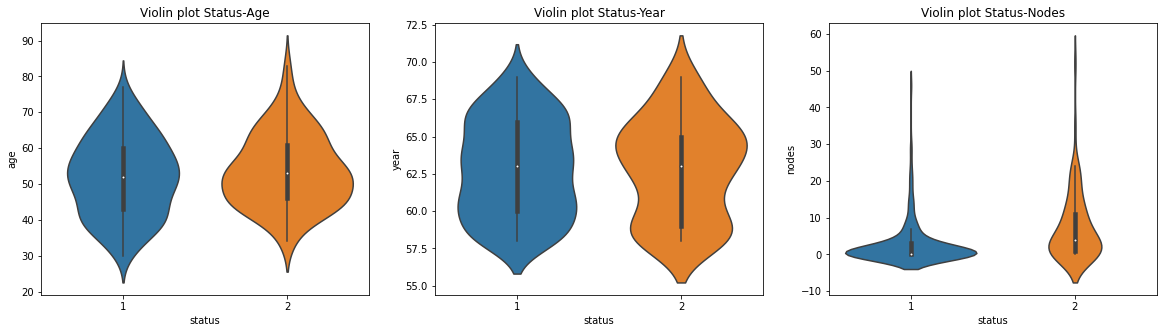

In [167]:
plt.figure()
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(x='status',y='age', data=df)
plt.title('Violin plot Status-Age')
plt.subplot(132)
sns.violinplot(x='status',y='year', data=df)
plt.title('Violin plot Status-Year')
plt.subplot(133)
sns.violinplot(x='status',y='nodes', data=df)
plt.title('Violin plot Status-Nodes')
plt.show()

***Observations***
1. The number of positive  axillary lymph nodes of the survivors is highly densed from 0 to 5 
2. Almost 80% of the patients have less than or equal to 5 positive  axillary lymph nodes. 
3. The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.
4. If number of axillary node is less,than survival of patients is more.

## 4. Bi-variate analysis 

### 4.1 2-D Scatter Plot 

#### Age of patient at time of operation (numerical) - Patient's year of operation (year - 1900, numerical)

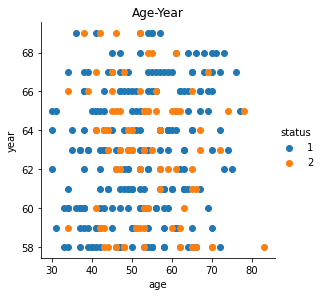

In [163]:
sns.FacetGrid(df, hue="status", height=4) \
.map(plt.scatter, "age", "year") \
   .add_legend();
plt.title('Age-Year')
plt.show();

**Observation(s):**
1. Features are overlapping  Here age and year is corelated features. We can't classify Survival Status from this combination

#### Patient's year of operation (year - 1900, numerical) - Number of positive axillary nodes detected (numerical)

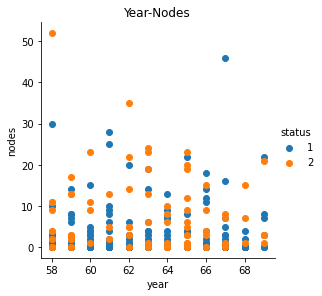

In [159]:
sns.FacetGrid(df, hue="status", size=4) \
.map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title('Year-Nodes')
plt.show();

**Observation(s):**
1. Same overlapping problem like previous one, no classification possible

#### Age of patient at time of operation (numerical) - Number of positive axillary nodes detected (numerical)

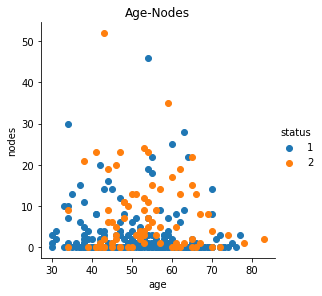

In [160]:
sns.FacetGrid(df, hue="status", size=4) \
.map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('Age-Nodes')
plt.show();

**Observation(s):**
1. Here 1 and 2 overlapped using Age and Axillary nodes dect features so the classifiaction between both is not possible. 
2. But we can see the better seperation between the two clases than other scatter plots.

### 4.2 Pair-plot

pairwise scatter plot: Pair-Plot

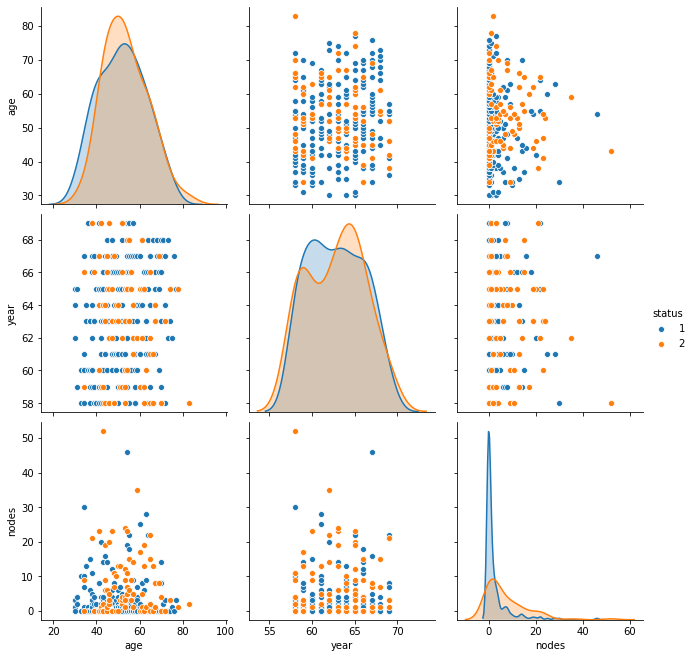

In [161]:
sns.pairplot(df, hue="status", height=3);
plt.show()

### 4.3 Multivariate probability density, contour plot 

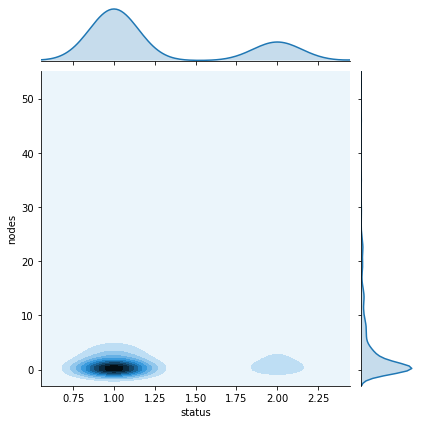

In [162]:
sns.jointplot(x="status", y="nodes", data=df, kind="kde");
plt.show();

**Observations**
1. Comparing with other 2 plots Age of patient at time of operation(Age) and Number of positive axillary nodes detected(Nodes) are the most useful features to identify Survival status.
2. There is no clear seperation between survival status
3. combinations of features are not useful in classfication
4. if number of axillary node is less,than survival of patients is more.

## 5. Conclusion

1. The given dataset is imbalenced as it does not contains euqal number of data-points for class 1 and class 2.
2. The given dataset is not linearly seprable form each class. There are too many overlapping in the data-points and hence it is very diffucult to classify using given features. 
3. we can not build simple model for classification using only if else condition. We need to have some more complex technique to handle this datase or more data faatures to build a efficient model
4. By plotting all pdf, cdf, box-plot, pair plots, scatter plot etc. we get only one conclusion if number of axillary node is less,than survival of patients is more.